<a href="https://colab.research.google.com/github/SknyL/Face_emotion_recognition/blob/main/Train_FER_model_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка датасета

In [44]:
!gdown 1V-ZnDOA8nqpNXpi_gg18v3tDX2lSMU9F

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1V-ZnDOA8nqpNXpi_gg18v3tDX2lSMU9F 



In [ ]:
!unzip -q '/content/drive/MyDrive/Colab Notebooks/Emotion Recognition/croped_train.zip' -d '/content/data/'

Загрузка скрипта с моделью классификации

In [164]:
!wget -O /content/model/class_model.py 'https://github.com/SknyL/Face_emotion_recognition/blob/c03b458c383b386434036087abd441858320a2bb/class_model.py?raw=true'

--2023-03-11 18:45:32--  https://github.com/SknyL/Face_emotion_recognition/blob/c03b458c383b386434036087abd441858320a2bb/class_model.py?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SknyL/Face_emotion_recognition/raw/c03b458c383b386434036087abd441858320a2bb/class_model.py [following]
--2023-03-11 18:45:32--  https://github.com/SknyL/Face_emotion_recognition/raw/c03b458c383b386434036087abd441858320a2bb/class_model.py
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SknyL/Face_emotion_recognition/c03b458c383b386434036087abd441858320a2bb/class_model.py [following]
--2023-03-11 18:45:32--  https://raw.githubusercontent.com/SknyL/Face_emotion_recognition/c03b458c383b386434036087abd441858320a2bb/class_model.py
Resolving raw.githubusercont

In [165]:
execfile('/content/model/class_model.py')

Создание dataflow для обучения модели классификации

In [46]:
image_size = (48,48)
batch_size = 32
train_path = '/content/data/content/data/croped_train'

In [47]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                rotation_range=15,
                                                                width_shift_range=0.05,
                                                                height_shift_range=0.05,
                                                                horizontal_flip=True,
                                                                validation_split=0.2,
                                                                fill_mode='nearest')

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          validation_split = 0.2)

In [48]:
train_dataflow = train_datagen.flow_from_directory(train_path,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    color_mode='grayscale',
                                                    class_mode='sparse',
                                                    shuffle=True,
                                                    subset='training',
                                                    interpolation='bilinear',
                                                    keep_aspect_ratio=True)

valid_dataflow = valid_datagen.flow_from_directory(train_path,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    color_mode='grayscale',
                                                    class_mode='sparse',
                                                    shuffle=True,
                                                    subset='validation',
                                                    interpolation='bilinear',
                                                    keep_aspect_ratio=True)

Found 36875 images belonging to 9 classes.
Found 9214 images belonging to 9 classes.


In [37]:
!wget -O /content/models/weights/model_class_weights.h5 'https://github.com/SknyL/Face_emotion_recognition/blob/main/model_class_weights.h5?raw=true'

--2023-03-11 17:56:12--  https://github.com/SknyL/Face_emotion_recognition/blob/main/model_class_weights.h5?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SknyL/Face_emotion_recognition/raw/main/model_class_weights.h5 [following]
--2023-03-11 17:56:12--  https://github.com/SknyL/Face_emotion_recognition/raw/main/model_class_weights.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SknyL/Face_emotion_recognition/main/model_class_weights.h5 [following]
--2023-03-11 17:56:12--  https://raw.githubusercontent.com/SknyL/Face_emotion_recognition/main/model_class_weights.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.g

In [38]:
path_weights = 'models/weights/model_class_weights.h5'

In [97]:
class_model = FER_class_model(path_model_weights=path_weights)

Model: "FER_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 48, 48, 64)        1664      
                                                                 
 conv2d_43 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_28 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 24, 24, 64)        0 

In [41]:
mcp = tf.keras.callbacks.ModelCheckpoint('weights/trained_model_class_weights.h5',
                                       monitor='val_mean_absolute_error',
                                       verbose=1,
                                       save_best_only=False,
                                       save_weights_only=True,
                                       save_freq='epoch',
                                       mode='min')

In [ ]:
my_optimiser = tf.keras.optimizers.Adam(
                learning_rate=0.001, 
                beta_1=0.9, 
                beta_2=0.999, 
                epsilon=1e-07, 
                amsgrad=False)
class_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=my_optimiser)
class_model.fit(train_dataflow, validation_data=valid_dataflow, epochs=50, callbacks=[mcp])

In [51]:
import cv2
from google.colab.patches import cv2_imshow

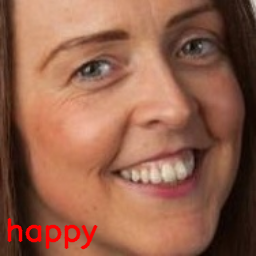

In [161]:
img_path = '/content/data/content/data/croped_train/happy/20.jpg'
img = cv2.imread(img_path)
img_pred = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_pred = img_pred / 255.
img_pred = cv2.resize(img_pred, (48,48))
img_pred = np.expand_dims(img_pred, -1)
prediction = class_model.get_emotion(img_pred)
img = cv2.resize(img, (256,256))
img = cv2.putText(img, f'{prediction}', (5, 225), 
                  cv2.FONT_HERSHEY_SIMPLEX, 
                  0.5, (0, 0, 255), 1, cv2.LINE_AA)
img = cv2.putText(img, f'{emotion_name}', (5, 250), 
                  cv2.FONT_HERSHEY_SIMPLEX, 
                  0.7, (0, 0, 255), 1, cv2.LINE_AA)
cv2_imshow(img)